In [2]:
!pip install pandas
!pip install scikit_learn
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [3]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
#genrating vector from textual coloumn of data frame for similarity finding with other dataframe coloumn of textual data

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def generate_vectors_and_find_similarity(df1, df2, text_column1, text_column2):

  vectors1 = model.encode(df1[text_column1].tolist())
  vectors2 = model.encode(df2[text_column2].tolist())

  similarity_matrix = cosine_similarity(vectors1, vectors2)

  # Create a DataFrame for similarity scores
  similarity_df = pd.DataFrame(similarity_matrix, index=df1[text_column1], columns=df2[text_column2])

  return similarity_df


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns

import re
import nltk
%matplotlib inline

# imputing Values of dimention and wieghts  

In [6]:
def apply_height_width(dimen):
    a=""
    #for values in meter
    if "m" in dimen and "c" not in dimen:
        for i in range(len(dimen)):
          if dimen[i]!=".":
            a=a+dimen[i]
          if dimen[i]==".":
            #a=a+dimen[i]
            a=a+dimen[i+1]
            try:
              a=a+dimen[i+2]
            except:
              pass
            break
        #print(dimen,":",a)
        #print("-----------------------------------------")
        return int(a)

    #for values in centimetere
    if "m" in dimen and "c" in dimen and "." in dimen :
      #print("in cm condition")
      #print(dimen,"::",dimen[:5])
      return dimen[:4]

    if "." not in dimen:
      #print("in inch condition",dimen , ":",int(dimen)/10)
      #print("++++++++++++----------------------------")
      return int(dimen)/10

def apply_depth(width):
    if len(str(width))==4:
      #print("width with original values",width)
      return width
    else:
      return width/10

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df=pd.read_excel('/content/drive/MyDrive/Product_similarity/Output_2024-07-08_samsung (1).xlsx')
df.columns
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 36
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Source            36 non-null     object 
 1   Model Name        36 non-null     object 
 2   Date              36 non-null     object 
 3   Time              36 non-null     object 
 4   Original_MRP      36 non-null     float64
 5   Discounted_Price  36 non-null     float64
 6   Product Height    36 non-null     object 
 7   Product Width     36 non-null     object 
 8   Product Depth     36 non-null     float64
 9   Machine Weight    36 non-null     float64
 10  Washing Capacity  36 non-null     float64
 11  Product Feature   36 non-null     object 
dtypes: float64(5), object(7)
memory usage: 3.7+ KB


In [11]:
#applying filter on value of width height and depth
df['Product Height']= df['Product Height'].apply(apply_height_width)
df['Product Width']= df['Product Width'].apply(apply_height_width)
df['Product Depth']= df['Product Depth'].apply(apply_depth)
#df['Product Depth']= df['Product Depth'].apply(apply_height)
df['combinedtext']=df['Model Name']+df['Product Feature']
df.drop(columns=['Date','Time','Source','Model Name','Product Feature'],inplace=True)
#df.drop(columns=['combinedtext'],inplace=True)
df.isna().sum()
df.head(11)


,Original_MRP,Discounted_Price,Product Height,Product Width,Product Depth,Machine Weight,Washing Capacity,combinedtext
0,16400.0,13000.0,100,83.0,48.5,23.7,7.5,7.5 kg Semi Automatic Washing Machine with Hex...
1,17500.0,13400.0,103.0,83.0,48.5,24.5,8.0,8.0 kg Semi Automatic Washing Machine with Hex...
2,15900.0,11690.0,96.5,83.0,48.5,23.0,7.5,WT75M3200LL Semi Automatic with Double Storm P...
3,18900.0,14800.0,103,83.0,48.5,24.5,8.5,8.5 kg Semi Automatic Washing Machine with Hex...
4,13500.0,11190.0,96.5,83.0,48.5,23.0,7.0,7.0 kg Semi Automatic Washing Machine with Dou...
5,12700.0,10400.0,93.0,75.0,45.0,19.0,6.5,WT65R2000HR Semi Automatic with Double Storm P...
6,27000.0,23400.0,98.8,54.0,56.8,28.5,7.0,7.0 kg Ecobubble™ Top Load Washing Machine wit...
7,28500.0,22490.0,98.8,54.0,56.8,28.5,7.0,7.0 kg Ecobubble™ Top Load Washing Machine wit...
8,25000.0,22000.0,98.8,54.0,56.8,28.5,7.0,7.0 kg Ecobubble™ Top Load Washing Machine wit...
9,25000.0,22000.0,98.8,54.0,56.8,28.5,7.0,7.0 kg Ecobubble™ Top Load Washing Machine wit...


In [12]:
df.head(6)

,Original_MRP,Discounted_Price,Product Height,Product Width,Product Depth,Machine Weight,Washing Capacity,combinedtext
0,16400.0,13000.0,100,83.0,48.5,23.7,7.5,7.5 kg Semi Automatic Washing Machine with Hex...
1,17500.0,13400.0,103.0,83.0,48.5,24.5,8.0,8.0 kg Semi Automatic Washing Machine with Hex...
2,15900.0,11690.0,96.5,83.0,48.5,23.0,7.5,WT75M3200LL Semi Automatic with Double Storm P...
3,18900.0,14800.0,103,83.0,48.5,24.5,8.5,8.5 kg Semi Automatic Washing Machine with Hex...
4,13500.0,11190.0,96.5,83.0,48.5,23.0,7.0,7.0 kg Semi Automatic Washing Machine with Dou...
5,12700.0,10400.0,93.0,75.0,45.0,19.0,6.5,WT65R2000HR Semi Automatic with Double Storm P...


In [13]:
'''input_data = {
    'Original_MRP': 30490,
    'Discounted_Price': 19990,
    'Product Height': 92.5,
    'Product Width': 54,
    'Product Depth': 56,
    'Machine Weight': 32,
    'Washing Capacity': 7.0,
    'combined_text':'LG 7Kg Top Load Washing Machine, Smart Inverter Motor, Middle Free Silver3 Motion End of Cycle Signal Auto Restart LoadSense Lint Filter Punch 3 Side Water Fall Smart Inverter Motor Soft Closing Door TurboDrum Gentle Wool Saree Strong Jeans Aqua Reserve Favorite Normal Pre Wash+Normal Quick Wash Tub Clean Wash Only Aqua Reserve Child Lock Soak Spin Only Stain Care Rinse Rinse Spin Time Delay Tub Clean Smart Diagnosis 3 Motion End of Cycle Signal Auto Restart LoadSense Lint Filter Punch 3 Side Water Fall Smart Inverter Motor Soft Closing Door TurboDrum Gentle Wool Saree Strong Jeans Aqua Reserve Favorite Normal Pre Wash+Normal Quick Wash Tub Clean Wash Only Aqua Reserve Child Lock Soak Spin Only Stain Care Rinse Rinse Spin Time Delay Tub Clean Smart Diagnosis'
}'''

input_df = pd.read_csv('/content/drive/MyDrive/Product_similarity/df.csv',index_col=False)
input_df=input_df.drop(columns=['Unnamed: 0'],axis=1)
input_df.head(5)

,Original_MRP,Discounted_Price,Product Height,Product Width,Product Depth,Machine Weight,Washing Capacity,combinedtext
0,24990,16491,87.0,54.0,56.0,30,6.5,"LG 6.5Kg Top Load Washing Machine, Smart Inver..."
1,30490,19990,92.5,54.0,56.0,32,7.0,"LG 7Kg Top Load Washing Machine, Smart Inverte..."
2,28490,17490,91.0,54.0,56.0,31,7.0,"LG 7Kg Top Load Washing Machine, Smart Inverte..."
3,52990,35990,85.0,60.0,45.5,63,7.0,"LG 7Kg Front Load Washing Machine, AI Direct D..."
4,29490,20490,91.0,54.0,56.0,31,7.5,"LG 7.5Kg Top Load Washing Machine, Smart Inver..."


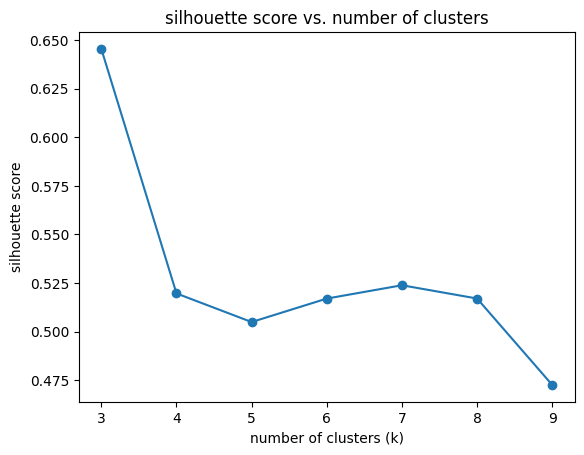

In [14]:
#a kmean Selhout scroe plot using df
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of k values to test
k_values = [3, 4, 5, 6, 7, 8, 9]

silhouette_scores = []


for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df.drop('combinedtext', axis=1))
  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(df.drop('combinedtext', axis=1), labels))

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('silhouette score')
plt.title('silhouette score vs. number of clusters')
plt.show()


##After Testing the Silhouette analysis we got that 3 cluter is giving Max score of 65.0 %

In [15]:
temp=input_df[8:9]
temp

,Original_MRP,Discounted_Price,Product Height,Product Width,Product Depth,Machine Weight,Washing Capacity,combinedtext
8,25490,19990,92.5,54.0,56.0,32,7.0,"LG 7Kg Top Load Washing Machine, Smart Inverte..."


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

features = df[['Original_MRP', 'Discounted_Price', 'Product Height', 'Product Width',
       'Product Depth', 'Machine Weight', 'Washing Capacity']].dropna()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

def get_similar_products(input_data, df, top_n=5):

  cluster = kmeans.predict(input_data[['Original_MRP', 'Discounted_Price', 'Product Height', 'Product Width',
       'Product Depth', 'Machine Weight','Washing Capacity']])[0]
  similar_products = df[df['cluster'] == cluster].drop('cluster', axis=1)
  return similar_products.head(top_n)

def generate_vectors_and_find_similarity(df1, df2):

  vectors1 = model.encode(df1['combinedtext'].tolist())
  #vectors for df2
  vectors2 = model.encode(df2['combinedtext'].tolist())
  #cosine similarity
  similarity_matrix = cosine_similarity(vectors1, vectors2)
  #DataFrame for similarity scores
  similarity_df = pd.DataFrame(similarity_matrix, index=df1['combinedtext'], columns=df2['combinedtext'])
  return similarity_df

<h2>Temp Code</h2>



In [17]:
temp=input_df[10:11]
#print(temp)


sample = pd.DataFrame(get_similar_products(temp,df))
#print(saample)

data_similarity_matrix=generate_vectors_and_find_similarity(sample,input_df)

data_similarity_matrix['row_name']=data_similarity_matrix.index

result_df= sample[sample['combinedtext'] == data_similarity_matrix['row_name'][0]]

result_df2=sample[sample['combinedtext'] == data_similarity_matrix['row_name'][1]]
result_df3=sample[sample['combinedtext'] == data_similarity_matrix['row_name'][2]]

result_df_final=pd.concat([result_df,result_df2,result_df3])
result_df_final

scores = data_similarity_matrix.iloc[:3, :1].values.flatten()

result_df_final['score']=scores
result_df_final=result_df_final.sort_values(by='score',ascending=True)
result_df_final

,Original_MRP,Discounted_Price,Product Height,Product Width,Product Depth,Machine Weight,Washing Capacity,combinedtext,score
12,46200.0,32490.0,85.0,60.0,55.0,65.0,8.0,8.0 kg Front Load Washing Machine with Hygiene...,0.800631
11,55900.0,36990.0,85.0,60.0,55.0,65.0,8.0,8.0 kg AI Ecobubble™ Front Load Washing Machin...,0.845716
14,50700.0,40000.0,85.0,60.0,55.0,65.0,8.0,8.0 kg EcoBubble™ Front loading Washing Machin...,0.846922


In [18]:
temp

,Original_MRP,Discounted_Price,Product Height,Product Width,Product Depth,Machine Weight,Washing Capacity,combinedtext
10,54990,40491,85.0,60.0,56.5,63,8.0,"LG 8Kg Front Load Washing Machine, AI Direct D..."
